# **Taller 3: clasificación de especies de iris usando K-vecinos más cercanos.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad Icesi.**

**Profesor: Breyner Posso.**

**Estudiante: Daniela Olarte**

**Estudiante: Duvan Cuero**

En este taller vamos a explorar el conjunto de datos iris que se usa desde hace varias décadas en estadística y reconocimiento de patrones. Este conjunto de datos fue utilizado por  Fisher en su artículo clásico de 1936, titulado "The Use of Multiple Measurements in Taxonomic Problems". El conjunto de datos muestra los atributos de tres especies de plantas que florecen, por ello, se presta para realizar un taller de clasificación. En esta sesión usted va a explorar el clasificador de k-vecinos más cercanos o KNN. Para ello va a explorar algunas de las etapas del flujo de proyectos de analítica que se han cubierto en el curso hasta el momento, entre ellos, el análisis exploratorio de datos incluyendo visualización, el escalado de los atributos de entrada, la división de los conjuntos de datos, y el cálculo y análisis de las métricas de desempeño de un clasificador. 

# 0. Importar librerías.

In [ ]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
from google.colab import files     #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn import neighbors  #Permite usar KNN.
from sklearn import metrics    #Permite calcular algunas métricas de desempeño.

from copy import deepcopy      #Permite hacer copias profundas. 

# 1. Cargar datos.

In [ ]:
#Primero vamos a descargar el archivo "iris.csv" en nuestra máquina local desde Moodle o desde esta ruta: https://www.kaggle.com/uciml/iris

#Ahora cargamos en Google Colab el archivo que tiene el conjunto de datos "iris.csv"
files.upload()  #Nota: si este comando falla, revise que su navegador permite el almacenamiento de cookies. 


Saving iris.csv to iris (1).csv


{'iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [ ]:
#Vamos a utilizar el dataset iris (https://www.kaggle.com/datasets/uciml/iris)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('iris.csv') #Ruta completa a la ubicación del archivo de interés.

# 2. Análisis exploratorio de datos.

In [ ]:
n_obs,n_atr = df.shape
print('Número de filas:' , n_obs)
print('Número de columnas:', n_atr)

Número de filas: 150
Número de columnas: 6


#### **Pregunta 2.1**

Indique los dipos de datos para cada uno de los atributos.

In [ ]:
#Respuesta Pregunta 2.1
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### **Pregunta 2.2**

Indique si el dataset tiene valores nulos.

In [ ]:
#Respuesta Pregunta 2.2
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Vamos a ver algunas estadísticas básicas del dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Inspeccionemos el dataframe:
print('-----------------------------------------------------------------------')
print('Primeras filas del dataframe:')  
print('-----------------------------------------------------------------------')
print(df.head(),'\n\n')

-----------------------------------------------------------------------
Primeras filas del dataframe:
-----------------------------------------------------------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 




### Así se ven las flores

![Flores]((/content/flores.jpg)

### Y sus partes


![Partes de las flores](/content/partes.jpg)

In [ ]:
#Necesitamos cambiar el dtype de la columna 'Species' a category.
df['Species'] = df['Species'].astype('category')
print('El nuevo dtype de la columna Species es: ',df['Species'].dtypes, '\n')


El nuevo dtype de la columna Species es:  category 



In [ ]:
print(df['Species'])
print('\n')
print(type(df['Species']))

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


<class 'pandas.core.series.Series'>


### Distribución de la variable Target

La lista de especies es:  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 

Conteo de objetos por especie:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

El tipo de este objeto es:  <class 'pandas.core.series.Series'> 



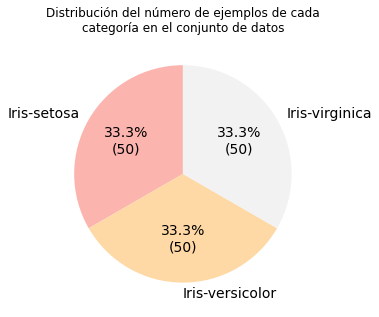

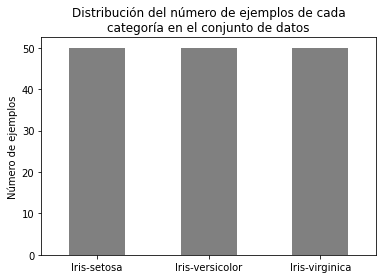

In [ ]:
#Revisemos las categorías del conjunto de datos.
lista_de_especies = df['Species'].unique().to_list()
print('La lista de especies es: ',lista_de_especies, '\n')

#Econtremos cómo están repartidas las categorías en el conjunto de datos. 
conteo_de_ejemplos_por_especie = df['Species'].value_counts()
print('Conteo de objetos por especie:\n', conteo_de_ejemplos_por_especie, '\n',sep='')
print('El tipo de este objeto es: ', type(conteo_de_ejemplos_por_especie),'\n')

#Revisemos esta información de forma gráfica.
#-------------------------------------------------------------------------------
#Opción 1: usemos un gráfico tipo pastel desde pandas. 
#-------------------------------------------------------------------------------
conteo_de_ejemplos_por_especie.plot(kind='pie', 
                                    figsize=(5, 5),
                                    #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_especie.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\ncategoría en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('') #Esto es para evitar un texto en el eje y que diría Species.
plt.show()

#-------------------------------------------------------------------------------
#Opción 2: usemos un gráfico de barras. 
#-------------------------------------------------------------------------------
ax = conteo_de_ejemplos_por_especie.plot.bar(x='Species', rot=0, color='gray')
plt.title(titulo) 
plt.ylabel('Número de ejemplos')
plt.show()



### Valores indeseados (ceros, outliers, etc.)

Atributo: SepalLengthCm
Número de valores 0:  0
Porcentaje de valores cero: 0.00


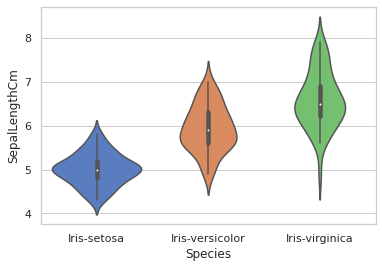

Atributo: SepalWidthCm
Número de valores 0:  0
Porcentaje de valores cero: 0.00


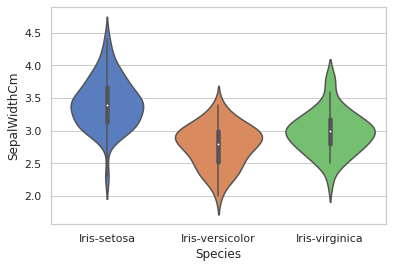

Atributo: PetalLengthCm
Número de valores 0:  0
Porcentaje de valores cero: 0.00


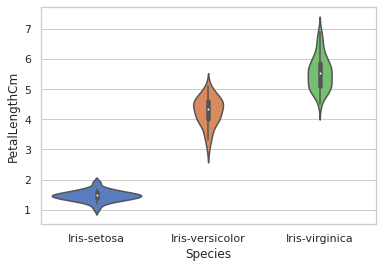

Atributo: PetalWidthCm
Número de valores 0:  0
Porcentaje de valores cero: 0.00


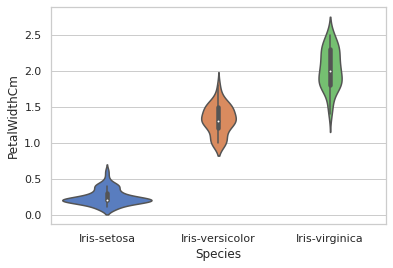

In [ ]:
#atributo = "Id"
#atributo = "SepalLengthCm" 
#atributo = "SepalWidthCm"
#atributo = "PetalLengthCm"
#atributo = "PetalWidthCm"

sns.set_theme(style="whitegrid")     
n_rows, n_cols = df.shape

for i in range(1,n_cols-1):
    atributo_de_interes = df.columns[i]
    count = (df[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    ax = sns.violinplot(x="Species", y=atributo_de_interes, data=df, palette="muted", split=True)
    plt.show()

### Histogramas

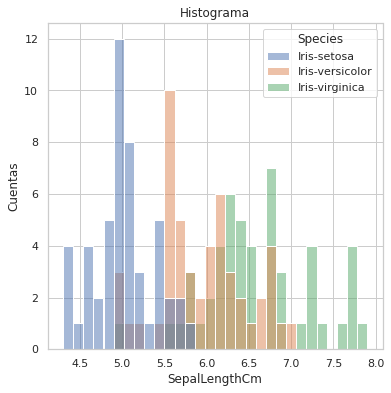

In [ ]:
#atributo = "Id"
atributo = "SepalLengthCm" 
#atributo = "SepalWidthCm"
#atributo = "PetalLengthCm"
#atributo = "PetalWidthCm"

#Qué tal si coloreamos el histograma de acuerdo con el número de cilindros de los vehículos?
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        = atributo,
             bins     = 30,
             hue      = 'Species',
             fill     = True,
             stat     = 'count')  #'count' muestra el número de observaciones.
                              #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                              #'density' normaliza las cuentas tal que el área del histograma es 1.
                              #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(atributo) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 
plt.show()

#### **Pregunta 2.3**

Construya histogramas para el resto de atributos y consigne las observaciones que considere pertinentes.

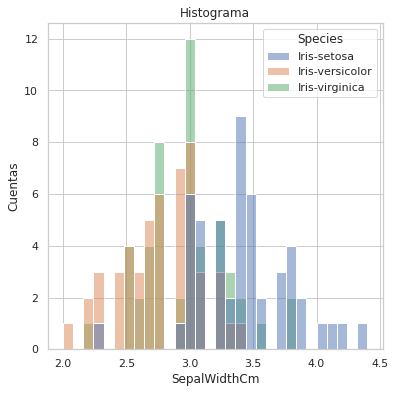

In [ ]:
#atributo = "Id"
#atributo = "SepalLengthCm" 
atributo = "SepalWidthCm"
#atributo = "PetalLengthCm"
#atributo = "PetalWidthCm"

plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        = atributo,
             bins     = 30,
             hue      = 'Species',
             fill     = True,
             stat     = 'count') 

plt.xlabel(atributo) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 
plt.show()

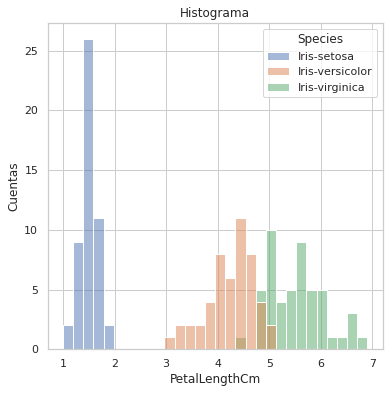

In [ ]:
#atributo = "Id"
#atributo = "SepalLengthCm" 
#atributo = "SepalWidthCm"
atributo = "PetalLengthCm"
#atributo = "PetalWidthCm"

plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        = atributo,
             bins     = 30,
             hue      = 'Species',
             fill     = True,
             stat     = 'count') 

plt.xlabel(atributo) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 
plt.show()

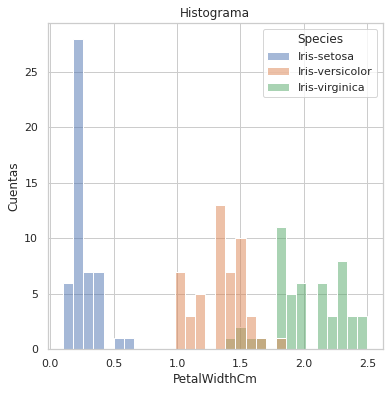

In [ ]:
#atributo = "Id"
#atributo = "SepalLengthCm" 
#atributo = "SepalWidthCm"
#atributo = "PetalLengthCm"
atributo = "PetalWidthCm"

plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        = atributo,
             bins     = 30,
             hue      = 'Species',
             fill     = True,
             stat     = 'count') 

plt.xlabel(atributo) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 
plt.show()

### Correlaciones

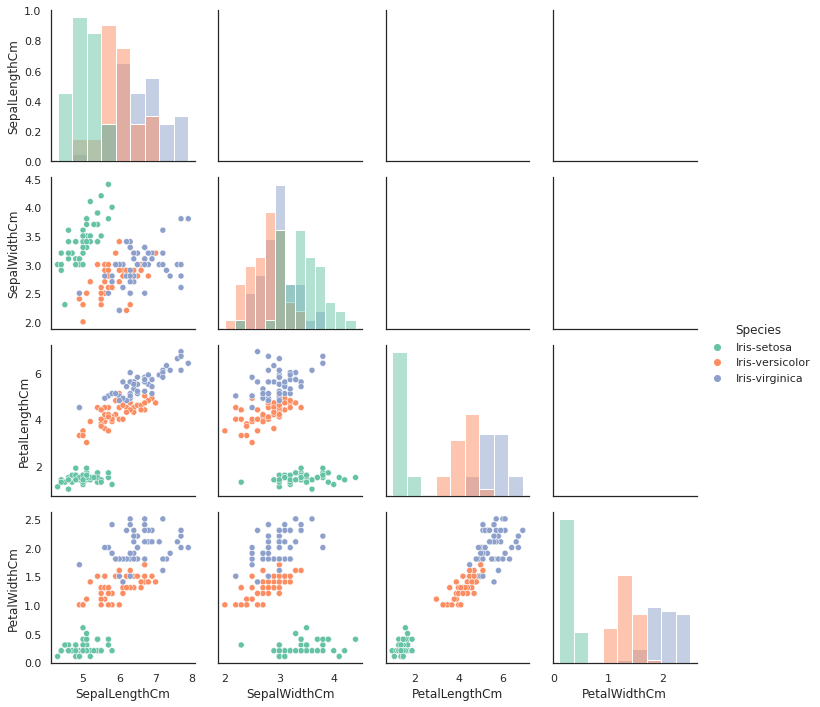

In [ ]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df.iloc[:,1:],hue='Species',diag_sharey=False, corner=False)  #Note que no graficamos la columna 0 correspondiente a Id, 
                                                                     #pues no aporta información. Usamos las categorías de la columna de
                                                                     #'Species' para colorear las gráficas.

g.map_diag(sns.histplot) #Muestra el histograma en la diagonal principal.
g.map_lower(sns.scatterplot) #Muestra gráficos de dispersión en la sección inferior izquierda de la matriz.

g.add_legend()

plt.show()

#### **Pregunta 2.4**

Observe la figura anterior e indique qué hipótesis puede realizar.

In [ ]:
#Respuesta Pregunta 2.4
#La relacion entre petalLength y PetalWidth es lineal es decir si una crece la otra tambien y el tamaño de cada tipo de Iris es muy diferente.
# Iris-setosa es mas facil de clasificar que las otras dos iris por sus caracteristicas. 


# 3. Modelo

### 3.1. Problema: Clasificación

### 3.2. Modelo: KNN

![knn](img/knn_algorithm.png)

### 3.3. Selección de atributos (predictores).

In [ ]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='Species' 

#Nombre de los posibles atributos de entrada:
# 'SepalLengthCm'
# 'SepalWidthCm'
# 'PetalLengthCm'
# 'PetalWidthCm'

#En este primer ejemplo vamos a utilizar 4 variables:
nombre_de_las_variables_de_entrada = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [ ]:
#La variable Target (Species) es categórica pero los valores no son apropiados para entrenar
#un modelo de Machine Learning

print(df[nombre_de_la_variable_de_salida])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [ ]:
#Vamos a aplicar una codificación one-hot a la variable de salida categórica, 
#para obtener un dataframe con las nuevas variables dummy de salida.
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

df_y = pd.get_dummies(df[nombre_de_la_variable_de_salida])
nombres_de_las_variables_de_salida = df_y.columns.to_list()
print('Nombres de las nuevas columnas: ',nombres_de_las_variables_de_salida,'\n')
print('Dataframe de salida:')
print(df_y)

#Ahora, obtenemos un dataframe con las variables de entrada que vamos a utilizar.
df_x = deepcopy(df[nombre_de_las_variables_de_entrada])
print('\nDataframe de entrada:')
print(df_x)

Nombres de las nuevas columnas:  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 

Dataframe de salida:
     Iris-setosa  Iris-versicolor  Iris-virginica
0              1                0               0
1              1                0               0
2              1                0               0
3              1                0               0
4              1                0               0
..           ...              ...             ...
145            0                0               1
146            0                0               1
147            0                0               1
148            0                0               1
149            0                0               1

[150 rows x 3 columns]

Dataframe de entrada:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           

### 3.4. División del conjunto de datos.

![division_datos](img/division_datos.png)

In [ ]:
# Vamos a dividir los datos en un conjunto de entrenamiento y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 5   #Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.8  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_pruebas       = 1.0-particion_para_entrenamiento #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x,                                         #100% de los datos de entrada. 
                                                              df_y,                                         #100% de los datos de salida. 
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 80%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 39 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de prueba 20%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 82 to 132
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  30 non-null   

#### **Pregunta 3.1**

Obtenga estadísticas básicas de los conjuntos de entrenamiento y prueba (puede usar df.describe()) y comparelas ¿qué puede concluir al respecto?

In [ ]:
#Respuesta Pregunta 3.1
print(df_x_train.describe(),'\n')
print(df_x_test.describe())



       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     120.000000    120.000000     120.000000    120.000000
mean        5.838333      3.069167       3.690833      1.170833
std         0.841186      0.456659       1.780709      0.770506
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.500000      0.300000
50%         5.750000      3.000000       4.250000      1.300000
75%         6.500000      3.400000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000 

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      30.000000     30.000000      30.000000     30.000000
mean        5.863333      2.993333       4.030000      1.310000
std         0.786736      0.324763       1.699523      0.735011
min         4.400000      2.400000       1.300000      0.100000
25%         5.150000      2.800000       2.100000      0.625000
50%         5.850000      2.950000    

Podemos ver que a pesar de que los datos de prueba y de entrenamiento son un poco distintos en sus medias son muy parecidos por lo que son equivalentes y por lo tanto se podria decir que cualquier grupo de datos significativos que sea tomado para entrenamiento va a pasar de forma muy posible las pruebas.

#### **Pregunta 3.2**

Obtenga la distribución en número y porcentaje de cada una de las clases tanto en el conjunto de entrenamiento como en el de prueba y comparelas ¿qué puede concluir al respecto?

In [ ]:
#Respuesta Pregunta 3.2
print(df_x_train.mean(),'\n')
print(df_x_test.mean())



SepalLengthCm    5.838333
SepalWidthCm     3.069167
PetalLengthCm    3.690833
PetalWidthCm     1.170833
dtype: float64 

SepalLengthCm    5.863333
SepalWidthCm     2.993333
PetalLengthCm    4.030000
PetalWidthCm     1.310000
dtype: float64


### 3.5. Escalado de atributos.

### 3.6. Contrucción del modelo.

In [ ]:
#-------------------------------------------------------------------------------
#K-vecinos más cercanos (K-nearest neighbors o simplemente KNN).
#-------------------------------------------------------------------------------
k   = 5  #Número de vecinos cercanos.
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 


KNeighborsClassifier()

### 3.7. Predicción.

#### 3.7.1. Conjunto de entrenamiento.

In [ ]:
y_pred_train = knn.predict(df_x_train)       #Realizamos predicciones sobre el conjunto de entrenamiento. 
                                                    #Note que knn.predict retorna un arreglo numpy NO un dataframe.
print('¿Qué retorna knn.predict? ','Tipo de dato: ',type(y_pred_train),'dimensiones: ', y_pred_train.shape)

#-------------------------------------------------------------------------------
###Nota: si usted necesitara o deseara convertir el arreglo numpy a un dataframe podría hacerlo fácilmente:
##df_y_pred_train = pd.DataFrame(data=y_pred,columns=nombres_de_las_variables_de_salida)
#-------------------------------------------------------------------------------

#Ahora, debemos convertir los valores "deseados" que tenemos como dataframes 
#en arreglos numpy para aprovechar las herramientas que nos ofrece scikit-learn.
y_train = df_y_train.values
print('¿Cómo están las salidas deseadas? ','Tipo de dato: ',type(y_train),'dimensiones: ', y_train.shape)

¿Qué retorna knn.predict?  Tipo de dato:  <class 'numpy.ndarray'> dimensiones:  (120, 3)
¿Cómo están las salidas deseadas?  Tipo de dato:  <class 'numpy.ndarray'> dimensiones:  (120, 3)


In [ ]:
print('Veamos el contenido de y_pred_train: \n')
print(y_pred_train)

Veamos el contenido de y_pred_train: 

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0

In [ ]:
print('Veamos el contenido de y_train: \n')
print(y_train)

Veamos el contenido de y_train: 

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1

#### 3.7.1. Conjunto de entrenamiento.

#### **Pregunta 3.3**

Obtenga la predicción para el conjunto de prueba y guardela en la variable y_pred_test y muestre sus dimensiones

In [ ]:
#Respuesta Pregunta 3.
y_pred_test = knn.predict(df_x_test)  

print(y_pred_test)

[[0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


# 4. Evaluación

### 4.1. Conjunto de entrenamiento.

### 4.2. Conjunto de prueba.

#### **Pregunta 4.1**

Cree la función cm_multi que reciba dos matrices y(mxn), y_pred(mxn) y devuelva la matriz de confusión
cm_m(nxn).

def cm_multi (y,y_pred):
    
    #Cuerpo de la función
    
    return cm_m

Use esta función para obtener e imprimir la matriz de confusión del clasificador KNN, tanto para el conjunto de entrenamiento como de prueba ¿qué se puede concluir de los resultados obtenidos?

In [ ]:
from sklearn.metrics import confusion_matrix

def multiply_matrix(A,B):
  return confusion_matrix(A,B)

In [ ]:
#-------------------------------------------------------------------------------
#Función auxiliar:
#-------------------------------------------------------------------------------
def one_hot_to_label_encoding(y_one_hot):
  """
  Esta función convierte un arreglo numpy y_one_hot, correspondiente a una matriz de 
  m observaciones por n clases de tipo binario, en un vector columna y_label_encoded
  de m filas cuyos elementos pueden tomar valores entre 0 y n-1. En ese caso
  0 corresponde a la primera categoría, 1 a la segunda categoría, y así
  sucesivamente. 
  """
  rows,cols=y_one_hot.shape            #Obtengo las dimensiones del arreglo.
  y_label_encoded = np.zeros((rows,1)) #Inicializo el arreglo de salida en ceros. 
  for i in range(cols): #Para todas las categorías (aunque estrictamente esto puede dejarse como range(1,cols,1), pues i=0 no hace nada. )
    y_label_encoded += i*y_one_hot[:,i].reshape((-1,1))  #Esto presume que la primera categoría se codifica como 0, 
                                                         #la siguiente como 1, etc...
  return y_label_encoded
#-------------------------------------------------------------------------------

Matriz de confusión para K=5 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


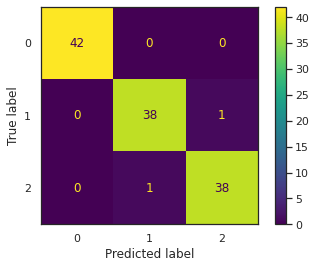

In [ ]:
#Ahora vamos a obtener la matriz de confusión para el conjunto de datos de entrenamiento.
#Note que la función confusion_matrix de scikit-learn espera vectores no matrices.
#Por eso se debe cambiar la codificación de one-hot a otra apropiada, en este caso
#usamos label encoding por comodidad:
cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  #Una matriz de confusión para todas las categorías.  
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp_1.plot()

for i in range(len(nombres_de_las_variables_de_salida)):
    print('Clase %d:' % i)
    print(nombres_de_las_variables_de_salida[i])

#### **Pregunta 4.2**

Compare los resultados obtenidos con su función cm_multi(y,y_pred) y los obtenidos mediante las dos celdas anteriores, tanto para los datos de entrenamiento como de prueba.

In [ ]:
multiply_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))

array([[42,  0,  0],
       [ 0, 38,  1],
       [ 0,  1, 38]])

#### **Pregunta 4.3**

Usando la matriz de confusión calcule y muestre, para cada una de las clases, las siguientes métricas: exactitud, precision, sensibilidad, especificidad y F1. Interprete el resultado obtenido para cada una de las métricas. Calcule la exactitud para el desempeño general del clasificador.

In [ ]:
#Respuesta 4.3
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_true =one_hot_to_label_encoding(y_train)
y_pred =one_hot_to_label_encoding(y_pred_train)
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))
print(recall_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None))
print(f1_score(y_true, y_pred, average=None))

[[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]
0.9833333333333333
[1.         0.97435897 0.97435897]
[1.         0.97435897 0.97435897]
[1.         0.97435897 0.97435897]


In [ ]:
#Ahora vamos a generar un reporte de scikit-learn que contiene algunas de las métricas de desempeño más comunes. 
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = nombres_de_las_variables_de_salida))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



#### **Pregunta 4.4**

Compare los resultados obtenidos al calcular las métricas manualmente y usando la función de sklearn.

# **EJERCICIOS PROPUESTOS TALLER 3.**

## **Ejercicio 1.**

Para el conjunto de datos iris, ¿cuál sería la exactitud (accuracy) de línea base (baseline)?

In [ ]:
print(accuracy_score(y_true, y_pred))

0.9833333333333333


## **Ejercicio 2.**

Para la función metrics.classification_report consulte qué representan los valores entregados.

Repuesta: Construir un informe de texto que muestre las principales métricas de clasificación.

In [ ]:
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = nombres_de_las_variables_de_salida))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



## **Ejercicio 3.**

Normalice los atributos, entrene un modelo con los atributos normalizados, pruebe este modelo tanto con los datos de entrenamiento y prueba, obtenga las métricas de desempeño por clase (matriz de confusión, exactitud, precisión, sensibilidad, especificidad y F1), obtenga la exactitud general y compare con los resultados obtenidos mediante el clasificador entrenado en la sesión de Taller.

* Normalizar
Un método incorporado llamado MinMaxScaler() está disponible en el módulo de preprocesamiento del paquete sklearn. 

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
normalizedlisttrain = scaler.fit_transform(df_x_train)
normalizedlisttest = scaler.fit_transform(df_x_test)

print('Normalized List of training:',normalizedlisttrain)
print('Normalized List of test:',normalizedlisttest)

Normalized List of training: [[0.22222222 0.58333333 0.08474576 0.04166667]
 [0.33333333 0.125      0.50847458 0.5       ]
 [0.38888889 0.25       0.42372881 0.375     ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.75       0.5        0.62711864 0.54166667]
 [0.19444444 0.54166667 0.06779661 0.04166667]
 [0.19444444 0.625      0.10169492 0.20833333]
 [0.94444444 0.41666667 0.86440678 0.91666667]
 [0.19444444 0.625      0.05084746 0.08333333]
 [0.58333333 0.5        0.72881356 0.91666667]
 [0.41666667 0.29166667 0.69491525 0.75      ]
 [0.36111111 0.20833333 0.49152542 0.41666667]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.22222222 0.75       0.10169492 0.04166667]
 [0.61111111 0.33333333 0.61016949 0.58333333]
 [0.52777778 0.33333333 0.6440678  0.70833333]
 [0.44444444 0.41666667 0.54237288 0.58333333]
 [0.66666667 0.54166667 0.79661017 0.83333333]
 [0.94444444 0.75       0.96610169 0.875     ]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.55555556 0.20833333 0.67796

## **Ejercicio 4:**

Entrene y evalúe clasificadores KNN usando los atributos no normalizados para valores de K={1,3,7,9,11,13,15}. De acuerdo con los resultados obtenidos, ¿qué valor de K recomendaría?. Tenga en cuenta evaluar tanto con los datos de entrenamiento como de prueba.

In [ ]:
k = 2  #Número de vecinos cercanos.
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador.

y_train = df_y_train.values
y_true =one_hot_to_label_encoding(y_train)
y_pred =one_hot_to_label_encoding(y_pred_train)
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))
print(recall_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None))
print(f1_score(y_true, y_pred, average=None))

[[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]
0.9833333333333333
[1.         0.97435897 0.97435897]
[1.         0.97435897 0.97435897]
[1.         0.97435897 0.97435897]


In [ ]:
def TrainAndPredictValues(K=5, x_test=df_x_test, y_test=df_y_test, x_train=df_x_train, y_train=df_y_train):
    k   = K  #Número de vecinos cercanos.
    knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
    knn.fit(x_train, y_train)
    
    # Predicciones
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    
    print("Training set")
    print(metrics.classification_report(one_hot_to_label_encoding(y_train.values),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = nombres_de_las_variables_de_salida))
    
    print("Test set")
    print(metrics.classification_report(one_hot_to_label_encoding(y_test.values),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = nombres_de_las_variables_de_salida))

In [ ]:
TrainAndPredictValues(K=1)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      1.00      1.00        39
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      0.82      0.86        11
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
TrainAndPredictValues(K=3)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=7)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=9)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=11)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=13)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=15)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## **Ejercicio 5:**

Entrene y evalúe clasificadores KNN usando los atributos normalizados para valores de K={1,3,7,9,11,13,15}. De acuerdo con los resultados obtenidos, ¿qué valor de K recomendaría?. Compare los resultados obtenidos en este punto con los obtenidos en el Ejercicio 4. Tenga en cuenta evaluar tanto con los datos de entrenamiento como de prueba.

In [ ]:
TrainAndPredictValues(K=1, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      1.00      1.00        39
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=3, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=7, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.93      0.97      0.95        39
 Iris-virginica       0.97      0.92      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=9, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.93      0.97      0.95        39
 Iris-virginica       0.97      0.92      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=11, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
TrainAndPredictValues(K=13, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=15, x_train=normalizedlisttrain, x_test=normalizedlisttest)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



La metrica F1Score al evaluarla da el tener una mayor cantidad de neighbors, por eso tomamos el valor 3.

## **Ejercicio 6.**

Encuentre un modelo de clasificación KNN que utilice solo tres atributos y cuyo desempeño sea igual o mejor que el modelo que usa cuatro atributos. Decida si es conveniente normalizar o no los atributos. Utilice diferentes valores de K. Para comparar varios modelos genere diferentes métricas de desempeño.
Al final indique, ¿por qué escogió esos atributos?, de los modelos entrenados ¿cuál escogería y por qué? ¿qué métricas de desempeño reportaría a un cliente y por qué?

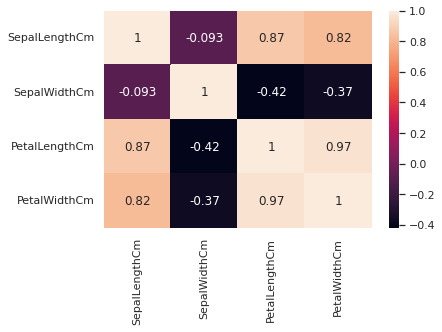

In [ ]:
corr_map = df_x_train.corr()
sns.heatmap(corr_map, annot=True)

In [ ]:
df_with3attributes = df_x_train.copy()
df_with3attributes.drop(["SepalLengthCm"], axis=1, inplace=True)
df_with3attributes.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,3.4,1.5,0.2
53,2.3,4.0,1.3
79,2.6,3.5,1.0
10,3.7,1.5,0.2
50,3.2,4.7,1.4


In [ ]:
df_with3attributes_test = df_x_test.copy()
df_with3attributes_test.drop(["SepalLengthCm"], axis=1, inplace=True)
df_with3attributes_test.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,2.7,3.9,1.2
134,2.6,5.6,1.4
114,2.8,5.1,2.4
42,3.2,1.3,0.2
109,3.6,6.1,2.5


In [ ]:
df_with3attributes_normalized = df_with3attributes / df_with3attributes.max()
df_with3attributes_normalized.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,0.772727,0.217391,0.08
53,0.522727,0.579710,0.52
79,0.590909,0.507246,0.40
10,0.840909,0.217391,0.08
50,0.727273,0.681159,0.56


In [ ]:
df_with3attributes_test_normalized = df_with3attributes_test / df_with3attributes_test.max()
df_with3attributes_test_normalized.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,0.729730,0.619048,0.48
134,0.702703,0.888889,0.56
114,0.756757,0.809524,0.96
42,0.864865,0.206349,0.08
109,0.972973,0.968254,1.00


Pruebas para evaluación de rendimiento:

In [ ]:
TrainAndPredictValues(K=3, x_train=df_with3attributes, x_test=df_with3attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=5, x_train=df_with3attributes, x_test=df_with3attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=7, x_train=df_with3attributes, x_test=df_with3attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



Datos sin normalizar:

Los 5 vecina tienen unn mayor desempeño en las metricas de: precisión, recall y F1-Score

Normalización de datos:

In [ ]:
TrainAndPredictValues(K=3, x_train=df_with3attributes_normalized, x_test=df_with3attributes_test_normalized)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
TrainAndPredictValues(K=5, x_train=df_with3attributes_normalized, x_test=df_with3attributes_test_normalized)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=7, x_train=df_with3attributes_normalized, x_test=df_with3attributes_test_normalized)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



Analisis: ya con los datos normalizados podemos decir que hay un mejor desempeño con 3 vecinos. La variable que no se utilizo fue la de SepalLengthCm porque no tiene valores de correlacion significativo con las demas

## **Ejercicio 7.**

Encuentre un modelo de clasificación KNN que utilice solo dos atributos y cuyo desempeño sea comparable con el modelo que usa cuatro atributos. Decida si es conveniente normalizar o no los atributos. Utilice diferentes valores de K. Para comparar varios modelos genere diferentes métricas de desempeño.
Al final indique, ¿por qué escogió esos atributos?, de los modelos entrenados ¿cuál escogería y por qué? ¿qué métricas de desempeño reportaría a un cliente y por qué?

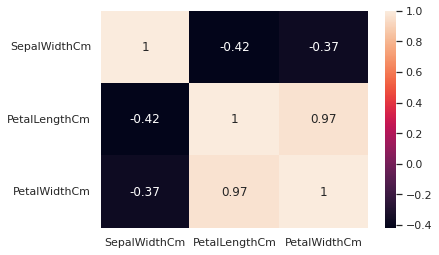

In [ ]:
corr_3attributes = df_with3attributes.corr()
sns.heatmap(corr_3attributes, annot=True)

Se puede evidenciar que todas las relaciones tienen variables con relacion directa e inversamente proporcional a excepcion de SepalWidthCm porque tiene una importancia menos significativa. Esto se debe a que su relacion con las demas variables es inversamente proporcional

In [ ]:
df_with2attributes = df_with3attributes.copy()
df_with2attributes.drop(["SepalWidthCm"], axis=1, inplace=True)
df_with2attributes.head()

,PetalLengthCm,PetalWidthCm
39,1.5,0.2
53,4.0,1.3
79,3.5,1.0
10,1.5,0.2
50,4.7,1.4


In [ ]:
df_with2attributes_test = df_with3attributes_test.copy()
df_with2attributes_test.drop(["SepalWidthCm"], axis=1, inplace=True)
df_with2attributes_test.head()

,PetalLengthCm,PetalWidthCm
82,3.9,1.2
134,5.6,1.4
114,5.1,2.4
42,1.3,0.2
109,6.1,2.5


In [ ]:
df_with2attributes_normalized = df_with2attributes / df_with2attributes.max()
df_with2attributes_normalized.head()

,PetalLengthCm,PetalWidthCm
39,0.217391,0.08
53,0.579710,0.52
79,0.507246,0.40
10,0.217391,0.08
50,0.681159,0.56


In [ ]:
df_with2attributes_test_normalized = df_with2attributes_test / df_with2attributes_test.max()
df_with2attributes_test_normalized.head()

,PetalLengthCm,PetalWidthCm
82,0.619048,0.48
134,0.888889,0.56
114,0.809524,0.96
42,0.206349,0.08
109,0.968254,1.00


In [ ]:
TrainAndPredictValues(K=3, x_train=df_with2attributes, x_test=df_with2attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      1.00      0.97        39
 Iris-virginica       1.00      0.95      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=5, x_train=df_with2attributes, x_test=df_with2attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=7, x_train=df_with2attributes, x_test=df_with2attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.95      0.95        39
 Iris-virginica       0.95      0.95      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=9, x_train=df_with3attributes, x_test=df_with3attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [ ]:
TrainAndPredictValues(K=11, x_train=df_with3attributes, x_test=df_with3attributes_test)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Datos sin normalizar: 

Con 11 vecinos se encuentra un rendimiento parecido a los datos con 4 variables con las metricas de rendimiento.

In [ ]:
TrainAndPredictValues(K=3, x_train=df_with3attributes_normalized, x_test=df_with3attributes_test_normalized)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
TrainAndPredictValues(K=5, x_train=df_with3attributes_normalized, x_test=df_with3attributes_test_normalized)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
TrainAndPredictValues(K=9, x_train=df_with3attributes_normalized, x_test=df_with3attributes_test_normalized)

Training set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Test set
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



## **Ejercicio 8.**

¿Qué valores puede tomar el hiperparámetro metric? ¿Cuál es la distancia que utiliza por defecto el clasificador KNN?
¿Qué valores puede tomar el hiperparámetro weight y cuál podría ser su utilidad?

El hiperparametro 'metric' puede tomar los valores de: ‘euclidean’, ‘manhattan’, ‘minkowski’

La distancia que utiliza por defecto el clasificador KNN es la distancia euclideana

El hiperparametro 'weights' puede tomar los valores de: ‘uniform’, ‘distance’

La utilidad de este hiperparametro es que puede dar mayor peso a los vecinos mas cercanos 

# **FIN**

# **Metodología**

1. Desarrolle las Preguntas propuestas en el Taller 3 de forma individual.

2. Después de la sesión de Taller 3, suba a Intu el archivo con la solución a las preguntas con nombre en el siguiente formato:

Taller_3_Apellido-Nombre.ipynb

3. Resuelva los Ejercicios Propuestos (en grupos de máximo 2 personas) en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo miércoles 21 de septiembre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_2_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del miércoles 21 de septiembre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 3 se asignará así:

- Preguntas Taller 2 (20%)

- Ejercicios Taller 2 (80%)
